[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Forests [structures that generate the entire result]

## Setup (RUN ME before executing any code in this section)

In [ ]:
!pip install --upgrade git+https://github.com/tdene/synth_opt_adders.git@v1.0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tdene/synth_opt_adders.git (to revision v1.0.5) to /tmp/pip-req-build-b6dtl5ix
  Running command git clone -q https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-b6dtl5ix
  Running command git checkout -q cbf5e7e8d9b501bb501fefdd463f1ff3b9644a60
  Created wheel for pptrees: filename=pptrees-1.0.5-py3-none-any.whl size=61676 sha256=70d579f4abaf34513e5953ff6619bd02d973061273e993cccbc1defe6825c4b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-yb5o7368/wheels/c6/3a/84/a6f13e63cee175e7643641f543504123889d15ad88285c95db
Successfully built pptrees


## Generating a classic structure [LEGACY]

Note: these cells are shown simply for illustrative purposes.<br>
The functionality in this section is legacy, supported only for backwards compatibility with past diagrams and methods.<br>
The code in this section should not be used in production.

The theory section discusses four classic, regular, structures.<br>
These architectures can be readily generated under this library using aliases.<br>
Note again that the "alias" parameter is legacy, supported only for backwards compatibility, and should not actually be used.

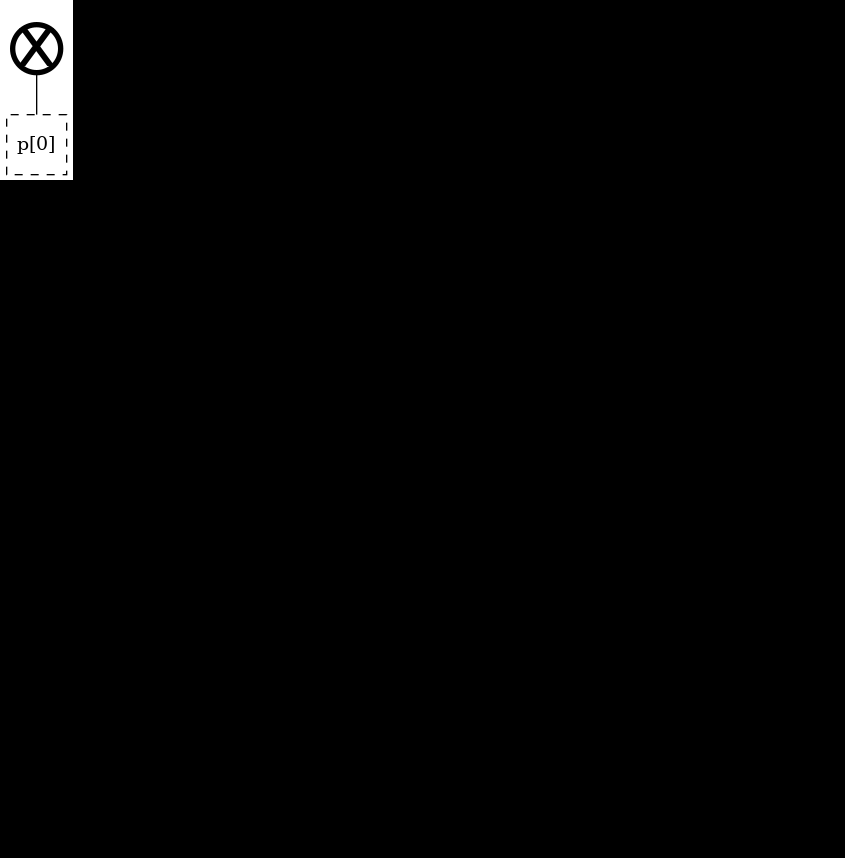

In [4]:
from pptrees.AdderForest import AdderForest as forest

width = 9
f = forest(width, alias = "ripple-carry")
f

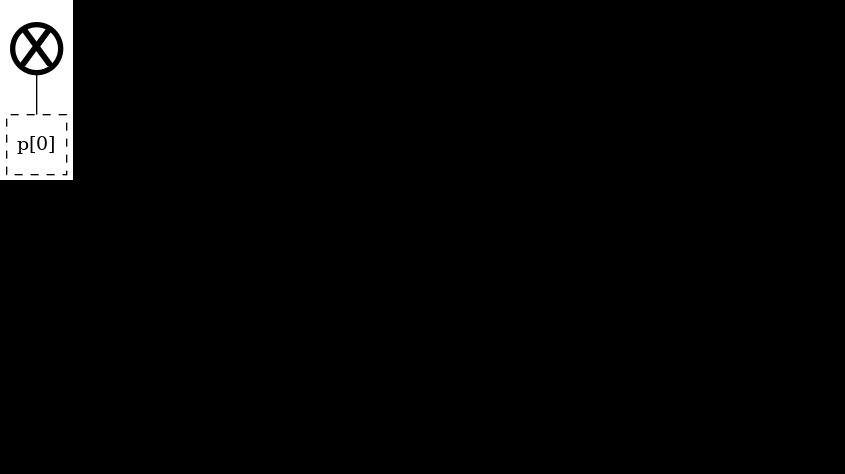

In [1]:
from pptrees.AdderForest import AdderForest as forest

width = 9
f = forest(width, alias = "sklansky")
f

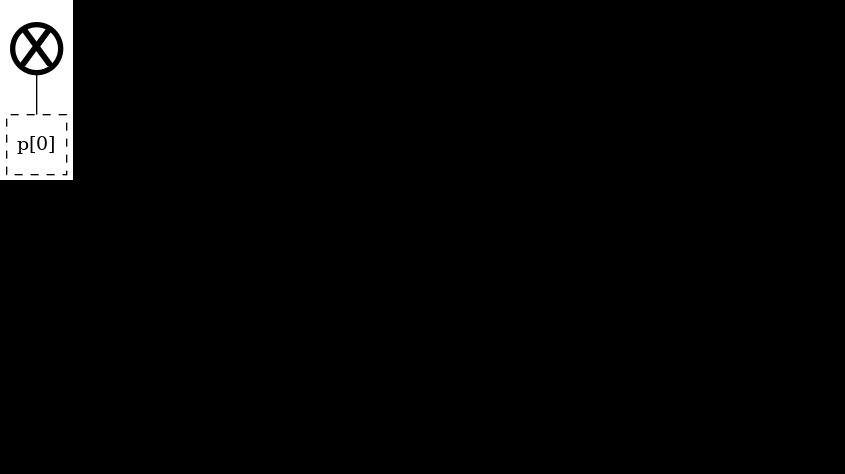

In [2]:
from pptrees.AdderForest import AdderForest as forest

width = 9
f = forest(width, alias = "kogge-stone")
f

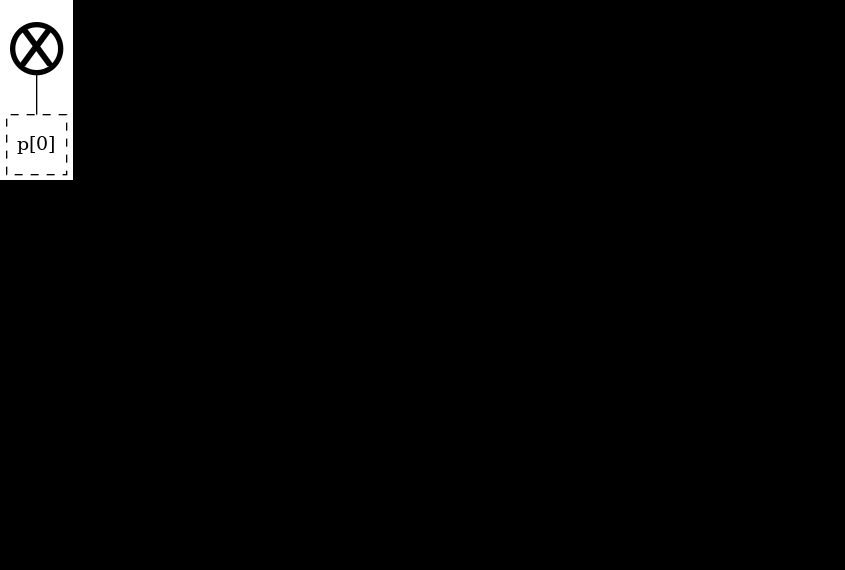

In [3]:
from pptrees.AdderForest import AdderForest as forest

width = 9
f = forest(width, alias = "brent-kung")
f.unmark_equivalent_nodes()
f

## How many possible forests are there?

In [6]:
from pptrees.util import catalan

width = 9
number_of_forests = 1
for a in range(width):
  number_of_forests = number_of_forests * catalan(a)
print(number_of_forests)

476150875200


## What do these forests look like?

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]


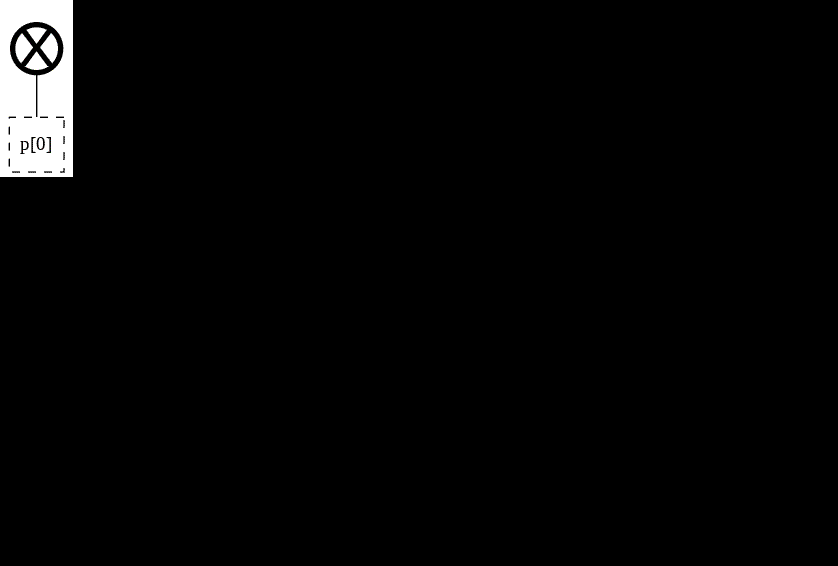

In [ ]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
f

## How do I get the forest that I want?

There are two, equivalent, ways to initialize a forest:

1.   Obtain a list of tree IDs, and use them to initialize the forest
2.   Obtain a list of trees, and use them to initialize the forest



The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]


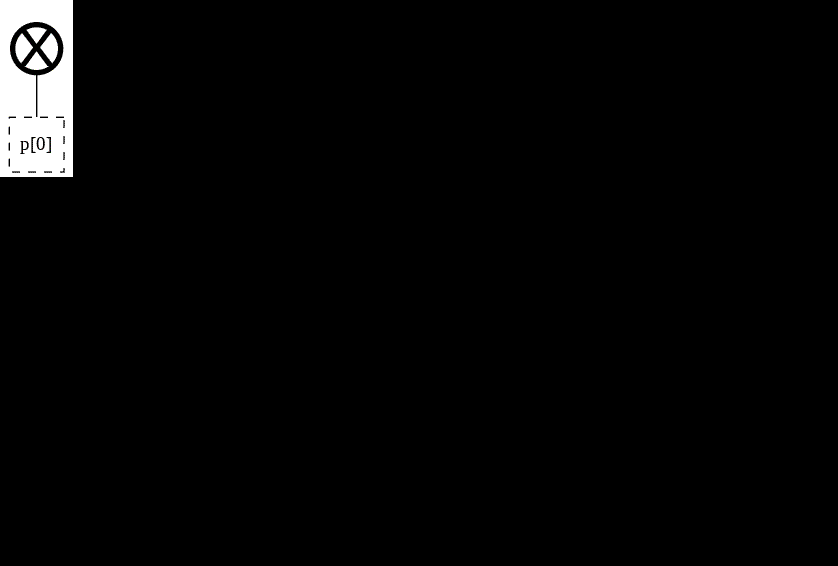

In [ ]:
# Method 1
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
f

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]


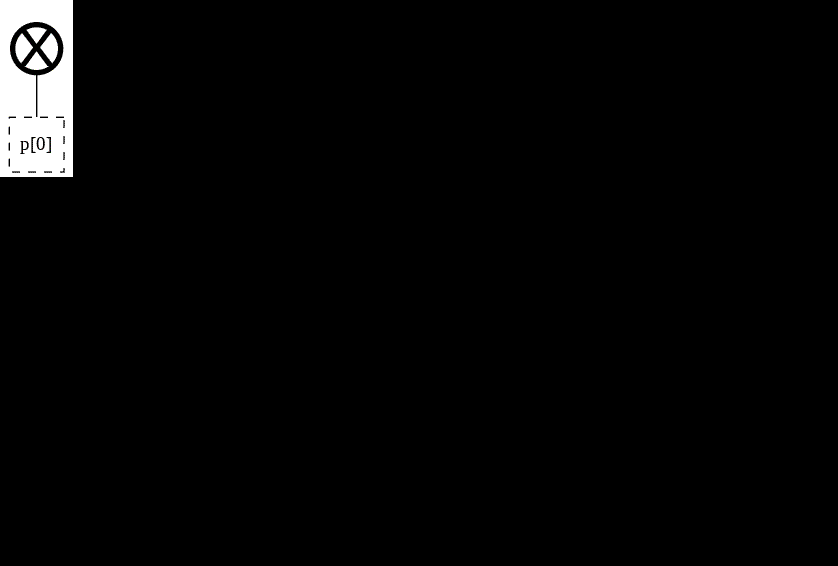

In [ ]:
# Method 2
from pptrees.AdderForest import AdderForest as forest
from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))

list_of_trees = []
list_of_trees.append(tree(1, start_point = 0))
list_of_trees.append(tree(2, start_point = 0))
list_of_trees.append(tree(3, start_point = 0))
list_of_trees.append(tree(4, start_point = 2))
list_of_trees.append(tree(5, start_point = 5))
list_of_trees.append(tree(6, start_point = 37))
list_of_trees.append(tree(7, start_point = 74))
list_of_trees.append(tree(8, start_point = 214))
list_of_trees.append(tree(9, start_point = 214))

f = forest(width, initialized_trees = list_of_trees)
f

## Okay, I have a forest. How do I make it faster?

In short, this can be achieved by making the underlying trees faster.

There is no hard rule for how this can be achieved. In general, here are some tips:

*   Reducing logic levels increases speed (at the cost of fanout and tracks)
*   Reducing fanout increases speed (at the cost of logic levels and tracks)
*   Reducing tracks increases speed (at the cost of logic levels and fanout)

Typically these three parameters affect delay in the order in which they are listed above, though that is not always the case.



Let's look at the previous forest example.

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]


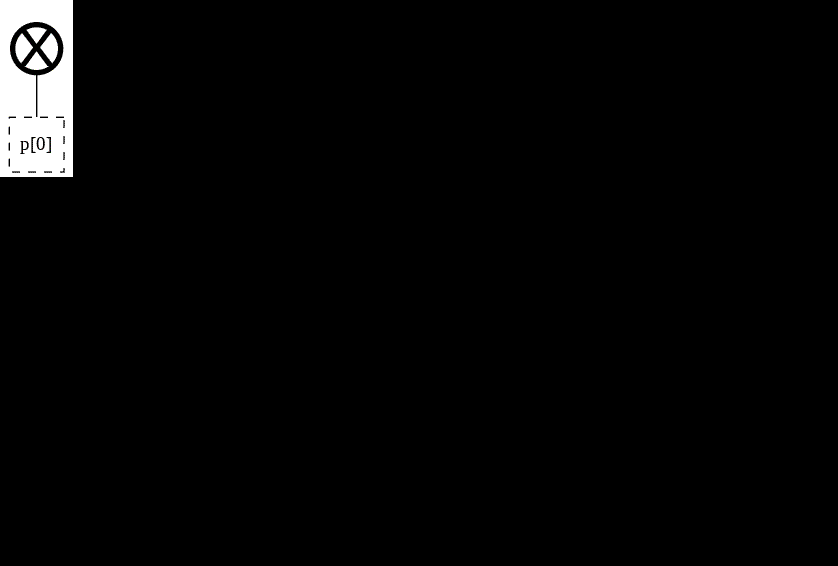

In [ ]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
f

Tree 5 (the 6th frame) is very unbalanced. Let's take a closer look.

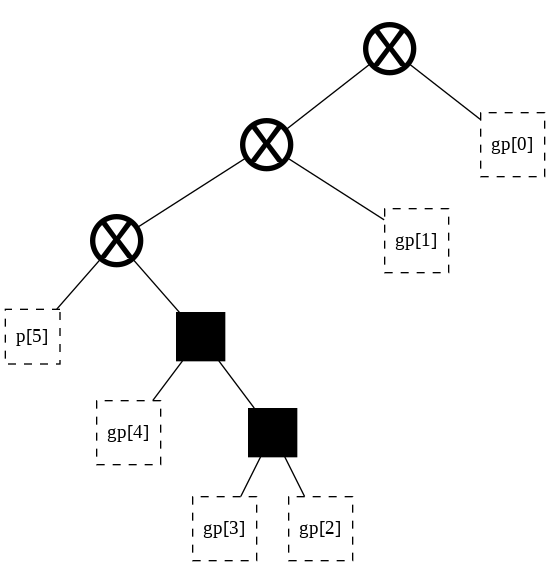

In [ ]:
f[5]

Let's reduce its height.

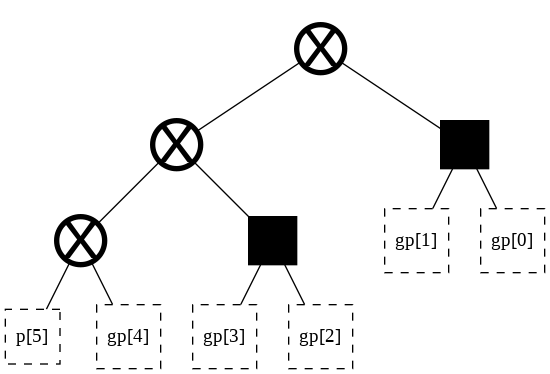

In [ ]:
f[5].left_rotate(f[5].root[0][0][1])
f[5].right_rotate(f[5].root[0][0])
f[5].right_shift(f[5].root[0][1])
f[5]

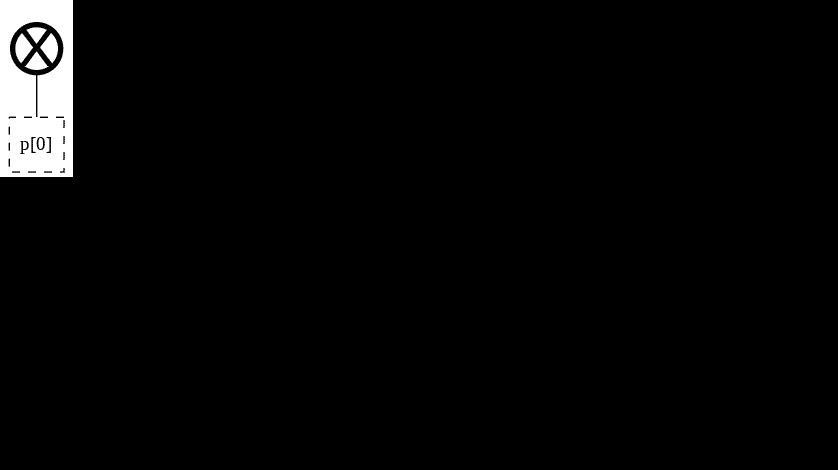

In [ ]:
f

## Okay, now how do I make a forest more power-efficient? Or smaller?

This can be achieved by making the individual trees in the forest share more nodes.

In general, the further to the left a node is, the more likely it is to be shared. Nodes on the right spine can never be shared.

Let's look at the previous forest example.

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]


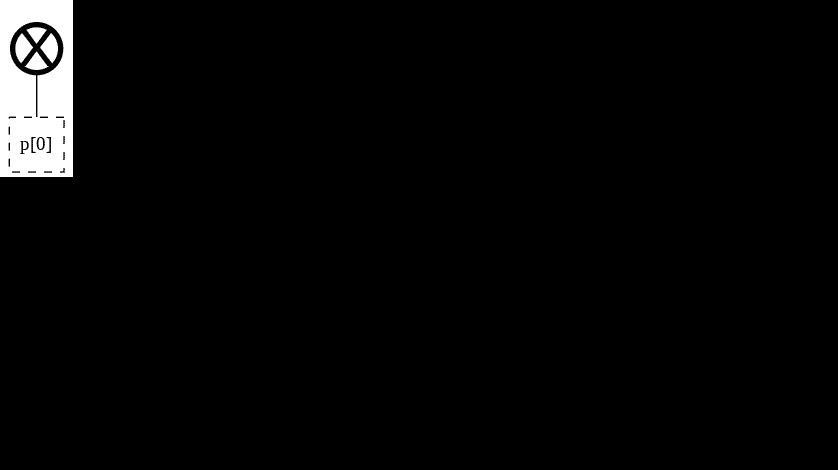

In [ ]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
f[5].left_rotate(f[5].root[0][0][1])
f[5].right_rotate(f[5].root[0][0])
f[5].right_shift(f[5].root[0][1])
f.find_equivalent_nodes()
f

Tne nodes that have been painted partially red are duplicates that need not be implemented in hardware. In other words, they are redundant copies of shared nodes.
This is merely cosmetic, intended to serve as a visual indicator.

Note that the very last frame of the shot has no such red-marked nods. Shared nodes only need to be implemented in hardware once, but they still need to be implemented that one time.

Most of the normal recurrence nodes used in the forest are already shared.<br>
However, the nodes on the left spine can never be shared.<br>
The left spine represents the combination of local and non-local aspects of the operation of binary addition. Each tree has its own unique local aspect.

Thus, one effective way to reduce the area and power consumption of the design is to move nodes off of the left spine.

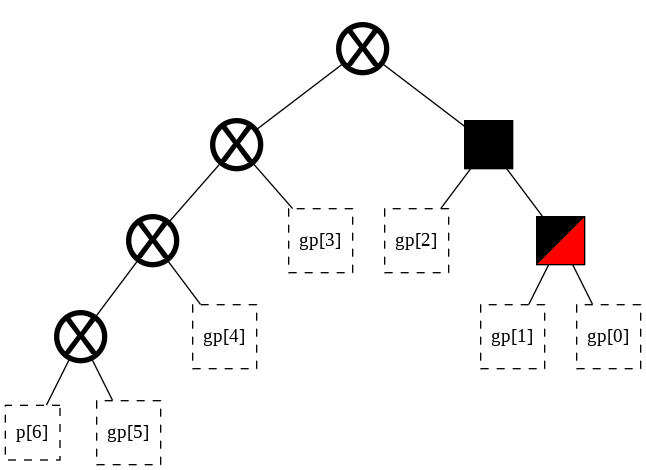

In [ ]:
f[6]

This seems as good of a candidate for rotation as any.

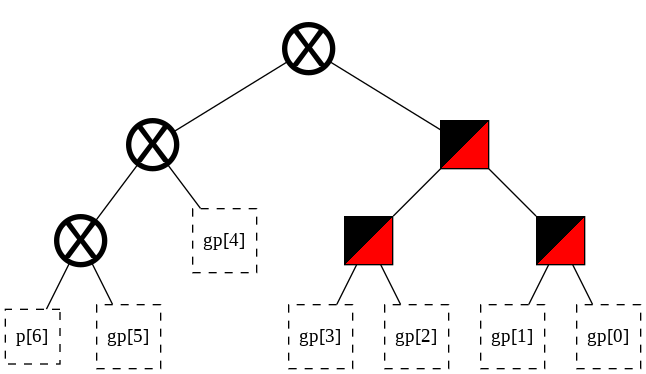

In [ ]:
f.reset_equivalent_nodes()
f[6].right_rotate(f[6].root[0])
f[6].left_rotate(f[6].root[1][1])
f.find_equivalent_nodes()
f[6]

Success! Area has been reduced by two nodes, which in this adder represents about a 6% improvement in area, and likely in power consumption as well.

Unfortunately, this modification has increased the fanout on the critical path, slowing down the maximum achievable speed of the design.

## What about fan-out decoupling / buffer insertion?

Fan-out decoupling, or buffer insertion, is a very important concept in hardware design. If a cell is driving 16 outputs, it could instead be made to drive 4 buffers, each of which drive 4 outputs of their own. Reducing fanout intelligently can improve the speed of a design, even while adding cells onto the circuit's timing paths.

Buffer insertion, or fanout decoupling, is not an inherent feature of logically synthesized hardware. It is a layout optimization to be performed after logical synthesis.

### But wait! Buffer insertion is the whole point of important classic structures such as Brent-Kung!

This is a Brent-Kung adder without buffer insertion:

The maximum tree sizes for a forest of width 17 are [0, 0, 1, 4, 13, 41, 131, 428, 1429, 4861, 16795, 58785, 208011, 742899, 2674439, 9694844, 35357669]


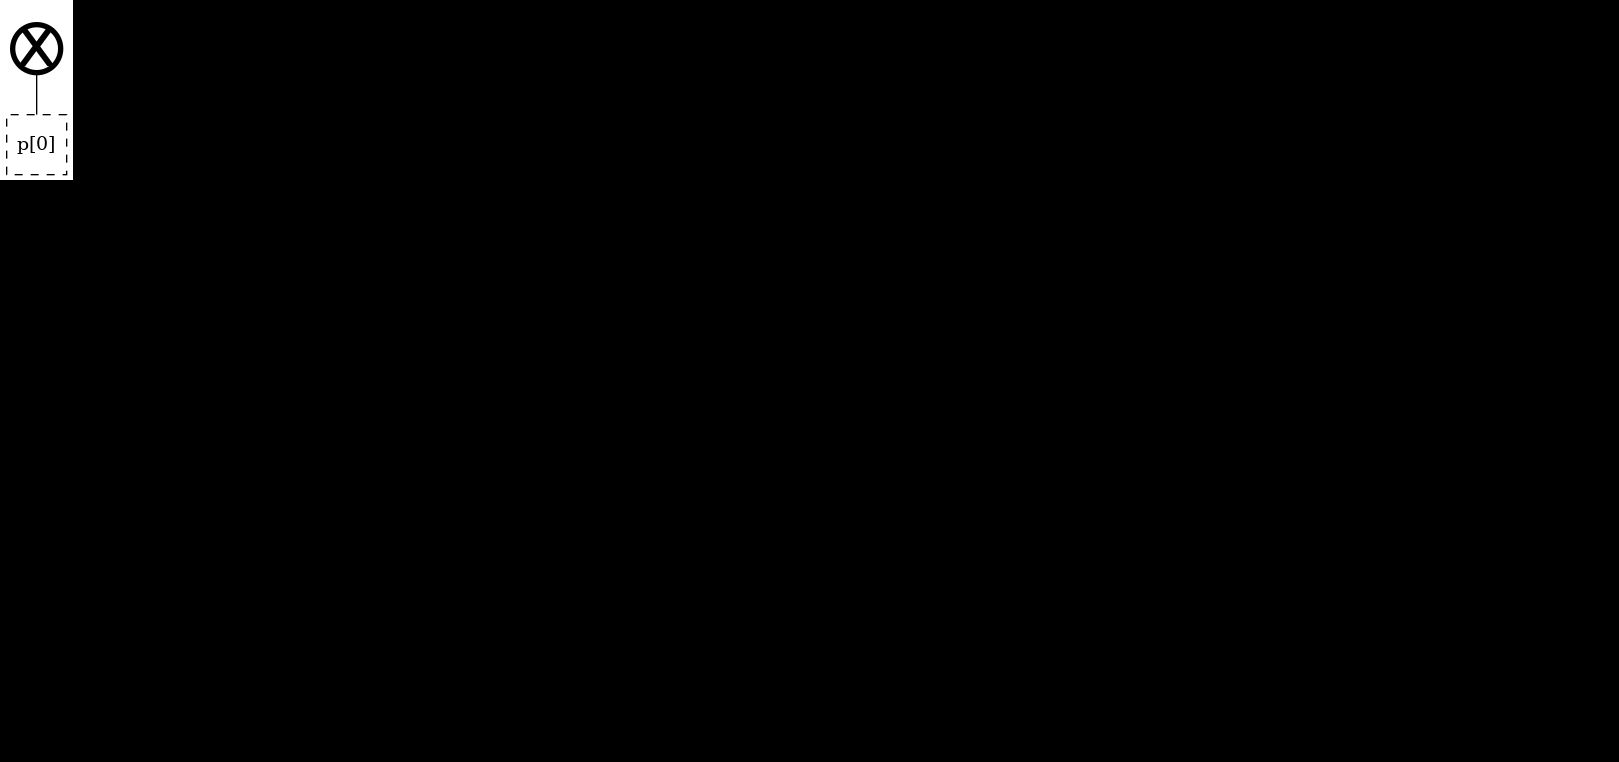

In [7]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 17
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width)
for t in f.trees[2:]:
  t.rbalance(t.root[1])
  while not t.root[1][0].is_proper():
    t.right_rotate(t.root[1][0])
f.find_equivalent_nodes()
f

This is a Brent-Kung adder with buffer insertion:

The maximum tree sizes for a forest of width 17 are [0, 0, 1, 4, 13, 41, 131, 428, 1429, 4861, 16795, 58785, 208011, 742899, 2674439, 9694844, 35357669]


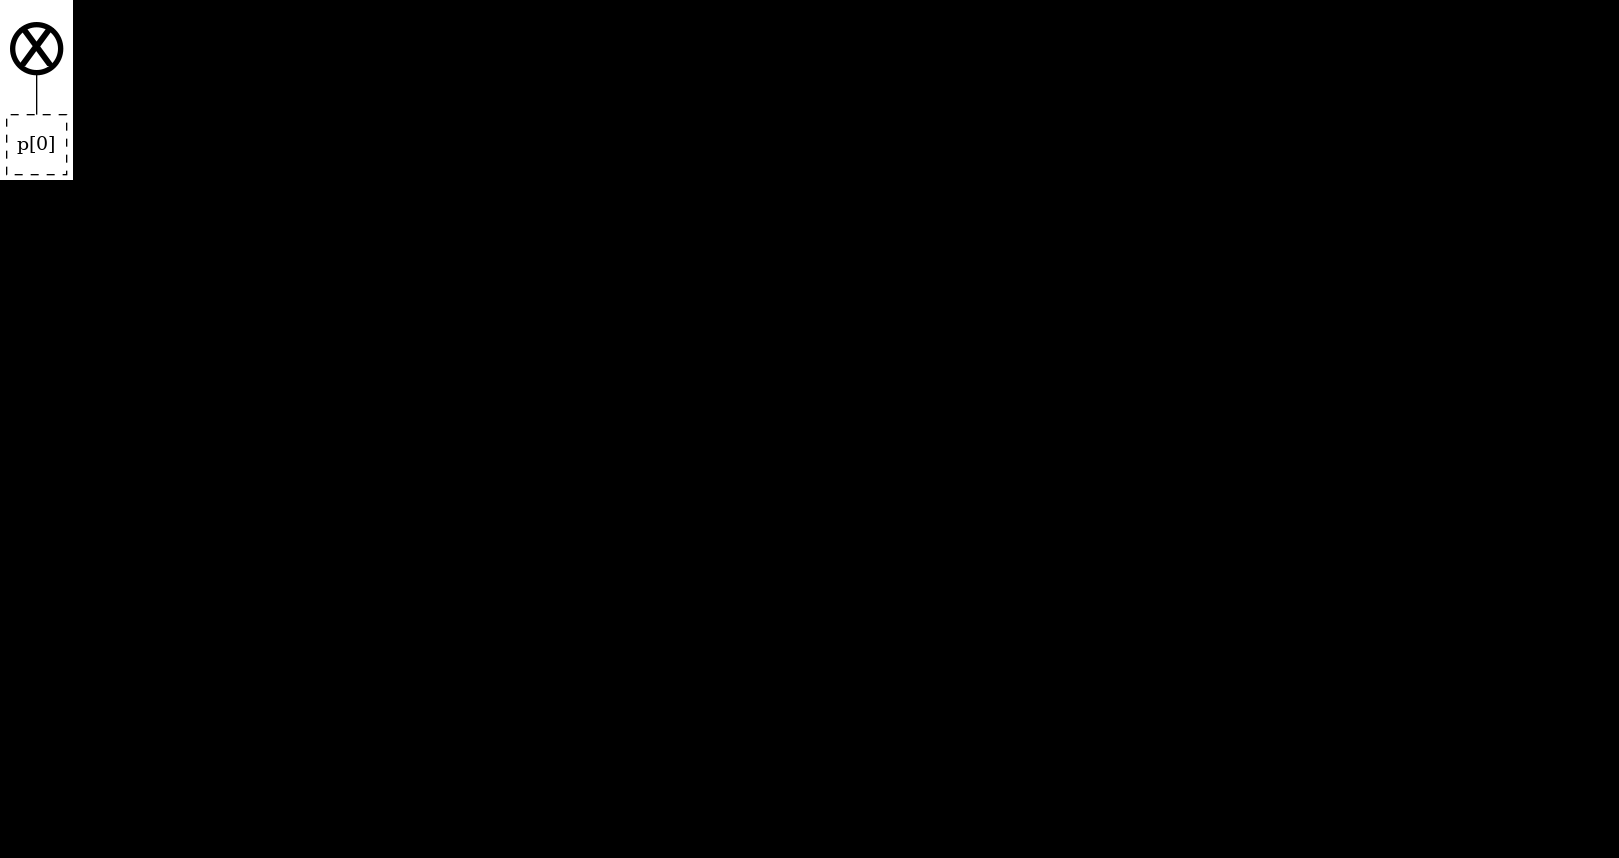

In [8]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 17
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width)
for t in f.trees[2:]:
  t.rbalance(t.root[1])
  while not t.root[1][0].is_proper():
    t.right_rotate(t.root[1][0])
f.find_equivalent_nodes()
f.calculate_fanout()
f.calculate_tracks()
f.decouple_all_fanout(maximum_fanout = 2)
f

The buffers are not the core benefit of Brent-Kung. The shared nodes are.<br>
Despite much personal misgiving, I have decided to accept the fact that buffer insertion is a post-production step, not an integral part of the tree structure.<br>
This point can be argued for a long time, but this is not the platform.

### Buffer insertion using this library

Buffer insertion can be readily performed through the insert_buffer and remove_buffer methods.

Let's look at the previous example.

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]


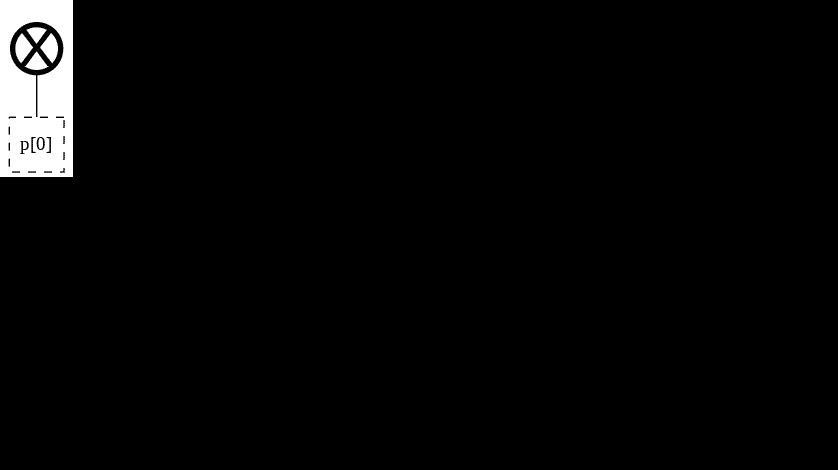

In [ ]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
f[5].left_rotate(f[5].root[0][0][1])
f[5].right_rotate(f[5].root[0][0])
f[5].right_shift(f[5].root[0][1])
f[6].right_rotate(f[6].root[0])
f[6].left_rotate(f[6].root[1][1])
f

There is clearly a lot of fanout on the node that combines gp[1] with gp[0].<br>
Let us reduce it through buffer insertion.

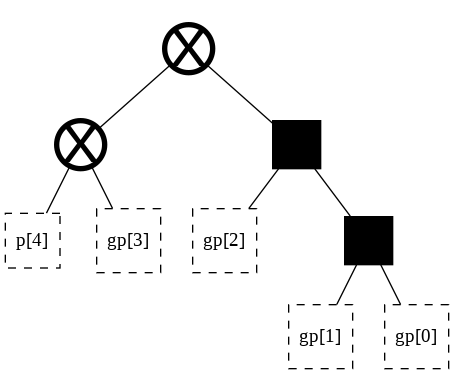

In [ ]:
f[4]

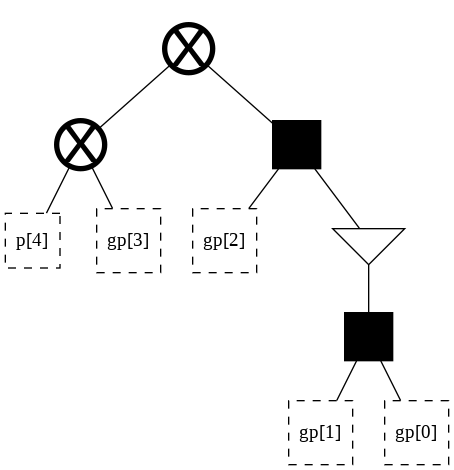

In [ ]:
f[4].insert_buffer(f[4].root[1][1])
f[4]

A convenient short-hand is also provided in the form of the decouple_fanout method. This method takes as argument a node whose output has fanout, and a tree chosen as a sacrifice. It then decouples the node's fanout by inserting a buffer into the chosen ~~tribute~~ tree.

This does require that the calculate_fanout method be executed first.

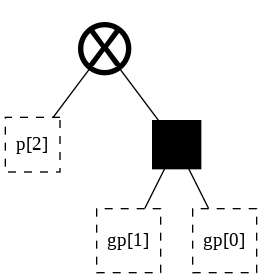

In [ ]:
f[2]

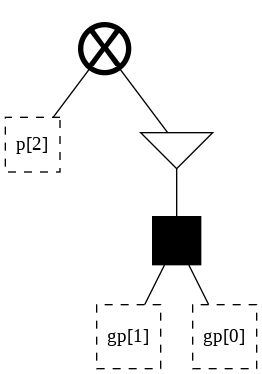

In [ ]:
f.calculate_fanout()
f.unmark_equivalent_nodes()
f.decouple_fanout(f[8].root[1][1][1],f[2])
f[2]

### Obtaining an HDL description

A basic HDL file can be obtained very simply, using the hdl()

In [2]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
_ = f.hdl("adder1.v", module_name="adder1")

!cat adder1.v

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]

module adder1(

	input [8:0] a_in,
	input [8:0] b_in,
	output [8:0] sum
	);


	adder1_tree_8 U0(
		.a_in(a_in[8:0]),
		.b_in(b_in[8:0]),
		.sum(sum[8])
	);

	adder1_tree_7 U1(
		.a_in(a_in[7:0]),
		.b_in(b_in[7:0]),
		.sum(sum[7])
	);

	adder1_tree_6 U2(
		.a_in(a_in[6:0]),
		.b_in(b_in[6:0]),
		.sum(sum[6])
	);

	adder1_tree_5 U3(
		.a_in(a_in[5:0]),
		.b_in(b_in[5:0]),
		.sum(sum[5])
	);

	adder1_tree_4 U4(
		.a_in(a_in[4:0]),
		.b_in(b_in[4:0]),
		.sum(sum[4])
	);

	adder1_tree_3 U5(
		.a_in(a_in[3:0]),
		.b_in(b_in[3:0]),
		.sum(sum[3])
	);

	adder1_tree_2 U6(
		.a_in(a_in[2:0]),
		.b_in(b_in[2:0]),
		.sum(sum[2])
	);

	adder1_tree_1 U7(
		.a_in(a_in[1:0]),
		.b_in(b_in[1:0]),
		.sum(sum[1])
	);

	adder1_tree_0 U8(
		.a_in(a_in[0]),
		.b_in(b_in[0]),
		.sum(sum[0])
	);
endmodule // adder1

module adder1_tree_0(

	input  a_in,
	input  b_in,
	output  sum
	);

// adder_forest tree_0
	wire n1_tree_

By default, HDL is behavioral.<br>
However, it can be very readily mapped onto a supported technology.<br>
This instantiates the required standard cell, resulting in structural HDL that is ready to be used by a place-and-route tool.

In [3]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
_ = f.hdl('mapped.v', optimization = 0, mapping = "sky130_fd_sc_hd")

!cat mapped.v

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]

module adder(

	input [8:0] a_in,
	input [8:0] b_in,
	output [8:0] sum
	);


	adder_tree_8 U0(
		.a_in(a_in[8:0]),
		.b_in(b_in[8:0]),
		.sum(sum[8])
	);

	adder_tree_7 U1(
		.a_in(a_in[7:0]),
		.b_in(b_in[7:0]),
		.sum(sum[7])
	);

	adder_tree_6 U2(
		.a_in(a_in[6:0]),
		.b_in(b_in[6:0]),
		.sum(sum[6])
	);

	adder_tree_5 U3(
		.a_in(a_in[5:0]),
		.b_in(b_in[5:0]),
		.sum(sum[5])
	);

	adder_tree_4 U4(
		.a_in(a_in[4:0]),
		.b_in(b_in[4:0]),
		.sum(sum[4])
	);

	adder_tree_3 U5(
		.a_in(a_in[3:0]),
		.b_in(b_in[3:0]),
		.sum(sum[3])
	);

	adder_tree_2 U6(
		.a_in(a_in[2:0]),
		.b_in(b_in[2:0]),
		.sum(sum[2])
	);

	adder_tree_1 U7(
		.a_in(a_in[1:0]),
		.b_in(b_in[1:0]),
		.sum(sum[1])
	);

	adder_tree_0 U8(
		.a_in(a_in[0]),
		.b_in(b_in[0]),
		.sum(sum[0])
	);
endmodule // adder

module adder_tree_0(

	input  a_in,
	input  b_in,
	output  sum
	);

// adder_forest tree_0
	wire n1_tree_0;
	assign s

However, synthesis tools do play another important role: they perform optimizations.

This library contains three levels of pre-optimization that is done to assist synthesis tools.

Level 0 of optimization is unoptimized.

Level 1 of optimization performs operation-specific logic trimming.

Certain operations, such as binary addition, allow for the simplification of logic on locations such as the most-significant or least-significant bit. This library can perform such optimizations.<br>
This is the recommended setting.

In [4]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
_ = f.hdl('mapped_opt1.v', optimization = 1, mapping = "sky130_fd_sc_hd")

!cat mapped_opt1.v

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]

module adder(

	input [8:0] a_in,
	input [8:0] b_in,
	output [8:0] sum
	);


	adder_tree_8 U0(
		.a_in(a_in[8:0]),
		.b_in(b_in[8:0]),
		.sum(sum[8])
	);

	adder_tree_7 U1(
		.a_in(a_in[7:0]),
		.b_in(b_in[7:0]),
		.sum(sum[7])
	);

	adder_tree_6 U2(
		.a_in(a_in[6:0]),
		.b_in(b_in[6:0]),
		.sum(sum[6])
	);

	adder_tree_5 U3(
		.a_in(a_in[5:0]),
		.b_in(b_in[5:0]),
		.sum(sum[5])
	);

	adder_tree_4 U4(
		.a_in(a_in[4:0]),
		.b_in(b_in[4:0]),
		.sum(sum[4])
	);

	adder_tree_3 U5(
		.a_in(a_in[3:0]),
		.b_in(b_in[3:0]),
		.sum(sum[3])
	);

	adder_tree_2 U6(
		.a_in(a_in[2:0]),
		.b_in(b_in[2:0]),
		.sum(sum[2])
	);

	adder_tree_1 U7(
		.a_in(a_in[1:0]),
		.b_in(b_in[1:0]),
		.sum(sum[1])
	);

	adder_tree_0 U8(
		.a_in(a_in[0]),
		.b_in(b_in[0]),
		.sum(sum[0])
	);
endmodule // adder

module adder_tree_0(

	input  a_in,
	input  b_in,
	output  sum
	);

// adder_forest tree_0
	wire n1_tree_0;
	assign s

Level 2 of optimization partitions the design into separate, flattened, sub-blocks.

Both proprietary as well as open-source tools heavily struggle with the optimization of fully-flattened arithmetic circuits, such as a binary adder. The performance of their output can suffer under such conditions.

However, not flattening the design at all leads to no optimization being performed by the synthesis tool. This is often worse.

Level 2 of optimization attempts to intelligently partition the design into individual flattened blocks that are easily digestible by synthesis tools.

This flag is designed to be run with a behavioral mapping, and with the synthesis tools being instructed to not further flatten the design.

In [2]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 9
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214])
_ = f.hdl('unmapped_opt2.v', optimization = 2)

!cat unmapped_opt2.v

The maximum tree sizes for a forest of width 9 are [0, 0, 1, 4, 13, 41, 131, 428, 1429]

module adder(

	input [8:0] a_in,
	input [8:0] b_in,
	output [8:0] sum
	);


	adder_tree_8 U0(
		.a_in(a_in[8:0]),
		.b_in(b_in[8:0]),
		.sum(sum[8]),
		.n28_tree_8(n28_tree_8),
		.n29_tree_8(n29_tree_8),
		.n24_tree_8(n24_tree_8),
		.n25_tree_8(n25_tree_8),
		.n22_tree_8(n22_tree_8),
		.n23_tree_8(n23_tree_8),
		.n17_tree_8(n17_tree_8),
		.n16_tree_8(n16_tree_8),
		.n15_tree_8(n15_tree_8),
		.n14_tree_8(n14_tree_8),
		.n10_tree_8(n10_tree_8),
		.n11_tree_8(n11_tree_8),
		.n12_tree_8(n12_tree_8),
		.n13_tree_8(n13_tree_8),
		.n20_tree_8(n20_tree_8),
		.n21_tree_8(n21_tree_8),
		.n33_tree_8(n33_tree_8),
		.n34_tree_8(n34_tree_8),
		.n35_tree_8(n35_tree_8)
	);

	adder_tree_7 U1(
		.a_in(a_in[7:0]),
		.b_in(b_in[7:0]),
		.n10_tree_8(n10_tree_8),
		.n11_tree_8(n11_tree_8),
		.n12_tree_8(n12_tree_8),
		.n13_tree_8(n13_tree_8),
		.n33_tree_8(n33_tree_8),
		.sum(sum[7])
	);

	adder_tree_6 U2(
		.a_in(a_in